In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp

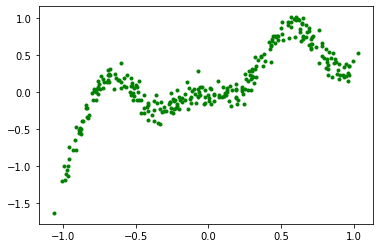

In [6]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
# xx = x.reshape(-1,1)
# yy = y.reshape(-1,1)
xx = np.c_[x,y]

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

## Doing Linear Autoencoder (1 line)

In [45]:
optimizer = tnn.Adam()
le1 = tnn.LinearLayer(2, 1, optimizer=optimizer)
ld1 = tnn.LinearLayer(1, 2, optimizer=optimizer)

In [46]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.show()

for step in range(100000):
    
    h = le1.forward(xx)
    yy = ld1.forward(h)
    
    dy = yy-xx
    dh = ld1.backward(dy)
    dx = le1.backward(dh)

    loss = (dy**2).mean()
    ld1.update()
    le1.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', color='g', label='x,y')
        
        plt.plot(yy[:,0], yy[:,1], c='r', lw=2, label='x,y_out')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.5677328608148645

_______________________
epoch 100
Loss 0.05729481514880109

_______________________
epoch 200
Loss 0.032472830622673046

_______________________
epoch 300
Loss 0.03207972273177006

_______________________
epoch 400
Loss 0.031959508898605

_______________________
epoch 500
Loss 0.03193083097751052

_______________________
epoch 600
Loss 0.03192545244951225

_______________________
epoch 700
Loss 0.03192466414572852

_______________________
epoch 800
Loss 0.031924574687643495

_______________________
epoch 900
Loss 0.031924566907160036

_______________________
epoch 1000
Loss 0.031924566394434264

_______________________
epoch 1100
Loss 0.03192456636917833

_______________________
epoch 1200
Loss 0.03192456636826368

_______________________
epoch 1300
Loss 0.031924566368239815

_______________________
epoch 1400
Loss 0.03192456636823938

_______________________
epoch 1500
Loss 0.031924566368239364

_______________________
epoch 160

TclError: invalid command name "pyimage419"

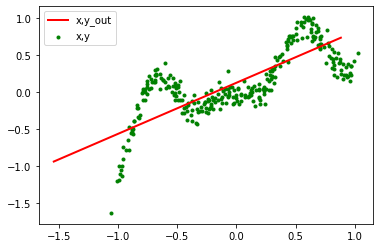

In [47]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g', label='x,y')
plt.plot(yy[:,0], yy[:,1], c='r', lw=2, label='x,y_out')
plt.legend()
plt.show()

## Doing 2 Encodes (2 pca)

In [64]:
optimizer = tnn.Adam()
le1 = tnn.LinearLayer(2, 1, optimizer=optimizer)
ld1 = tnn.LinearLayer(1, 2, optimizer=optimizer)

le2 = tnn.LinearLayer(2, 1, optimizer=optimizer)
ld2 = tnn.LinearLayer(1, 2, optimizer=optimizer)

In [65]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.show()

for step in range(100000):
    
    h1 = le1.forward(xx)
    h2 = le2.forward(xx)

#     h1 = h2 = h1+h2
    
    yy1 = ld1.forward(h1)
    dy1 = yy1-xx

    yy2 = ld2.forward(h2)
    dy2 = yy2-xx
    
    #### Choosing best AE for the data ####
    e1 = (dy1**2).mean(axis=1, keepdims=True)
    e2 = (dy2**2).mean(axis=1, keepdims=True)
    
    mask1 = e1<e2
    mask2 = ~mask1
    
    yy1 = yy1*mask1
    yy2 = yy2*mask2
    
    dy1 = dy1*mask1
    dy2 = dy2*mask2
    
    ### Backpropagation
    loss1 = (dy1**2).mean()
    loss2 = (dy2**2).mean()
    loss = ((dy1 + dy2)**2).mean()
    
    dh1 = ld1.backward(dy1)
    dx1 = le1.backward(dh1)
    
    dh2 = ld2.backward(dy2)
    dx2 = le2.backward(dh2)
    
    ld1.update()
    le1.update()
    
    ld2.update()
    le2.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print(f"Loss {loss} l1 {loss1} l2 {loss2}")

        ax.clear()
        plt.scatter(x, y, marker='.', color='g', label='x,y')
        
        plt.scatter(yy1[:,0], yy1[:,1], c='r', lw=2, label='x,y_out1')
        plt.scatter(yy2[:,0], yy2[:,1], c='m', lw=2, label='x,y_out2')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.1325437384354441 l1 0.038928670218614875 l2 0.0936150682168292

_______________________
epoch 100
Loss 0.014855971668712437 l1 0.007563914010463612 l2 0.00729205765824882

_______________________
epoch 200
Loss 0.009775649136672409 l1 0.006800879580448065 l2 0.0029747695562243417

_______________________
epoch 300
Loss 0.009573792673240097 l1 0.00678849171633282 l2 0.0027853009569072788

_______________________
epoch 400
Loss 0.009422584181444387 l1 0.006470721862996772 l2 0.002951862318447615

_______________________
epoch 500
Loss 0.009312009907003238 l1 0.0065570430566892395 l2 0.0027549668503139974

_______________________
epoch 600
Loss 0.009258000652451087 l1 0.0065570430124818144 l2 0.0027009576399692706

_______________________
epoch 700
Loss 0.009234034453120049 l1 0.006557043012480365 l2 0.0026769914406396837

_______________________
epoch 800
Loss 0.00922492346896521 l1 0.006557043012480365 l2 0.0026678804564848435

____________________

TclError: invalid command name "pyimage604"

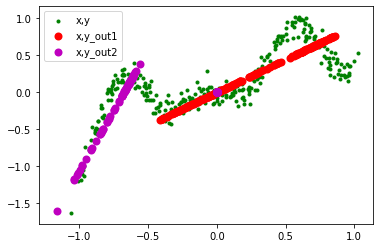

In [63]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g', label='x,y')
plt.scatter(yy1[:,0], yy1[:,1], c='r', lw=2, label='x,y_out1')
plt.scatter(yy2[:,0], yy2[:,1], c='m', lw=2, label='x,y_out2')
plt.legend()